In [1]:
%cd /home/denis/git/dev/ice_drift_pc_ncc/tools/rcm_proc

/home/denis/git/dev/ice_drift_pc_ncc/tools/rcm_proc


In [2]:
from rcm_proc import *

In [2]:
# Open L1 zip file
rcm = dataRCM(file_path='/data/rrs/seaice/aux_data/RCM/ant/raw/RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD.zip',
              out_path='/data/rrs/seaice/aux_data/RCM/ant/raw/test/')

# Extract metadata
rcm.extract_metadata()

# Define clipping values in dB for each polarization 
# or skip it
clip_pars = {'HH': {'db_min': -25, 'db_max': -5},
             'HV': {'db_min': -33, 'db_max': -10}}

# Calibrate
rcm.calibrate_data(clip=clip_pars)

/data/rrs/seaice/aux_data/RCM/ant/raw/RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD.zip will be processed.
/data/rrs/seaice/aux_data/RCM/ant/raw/test//RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD/imagery/2431752_1_HV.tif
/data/rrs/seaice/aux_data/RCM/ant/raw/test//RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD/imagery/2431752_1_HH.tif
/data/rrs/seaice/aux_data/RCM/ant/raw/test//RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD/metadata/calibration/lutSigma_HV.xml
/data/rrs/seaice/aux_data/RCM/ant/raw/test//RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD/metadata/calibration/lutSigma_HH.xml

Calibrating /data/rrs/seaice/aux_data/RCM/ant/raw/test//RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD/imagery/2431752_1_HV.tif


/home/denis/git/RCM_tools/rcm_proc.py:135: RuntimeWarning: divide by zero encountered in log10
  sz_dB = 10. * np.log10(sz)



Clipping in {'db_min': -33, 'db_max': 0}
Done.

Calibrating /data/rrs/seaice/aux_data/RCM/ant/raw/test//RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD/imagery/2431752_1_HH.tif

Clipping in {'db_min': -27, 'db_max': 0}
Done.


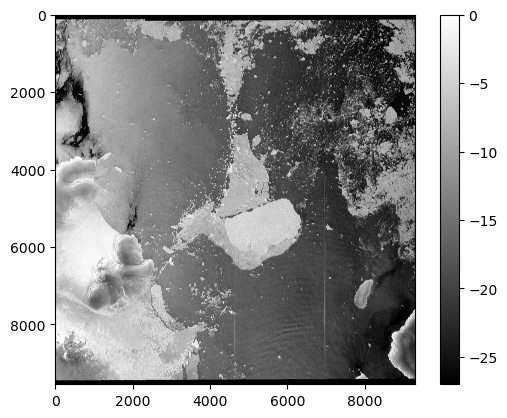

In [3]:
# Plot the calibrated data (expected to be in the range [0,-25] dB)
import matplotlib.pyplot as plt
plt.imshow(rcm.pols['HH']['lut_sz_2D_dB'], cmap='gray')
plt.colorbar()

In [4]:
# Project data at original resolution onto the Antarctic stereographic projection (3031)
rcm.export_projected_geotiff(output_path='/data/rrs/seaice/aux_data/RCM/ant/raw/tiff_tests', epsg=3031)

### Open input file: /data/rrs/seaice/aux_data/RCM/ant/raw/tiff_tests/RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD_HV.tiff
0...10...20...30...40...50...60...70...80...90...Done.
### Open input file: /data/rrs/seaice/aux_data/RCM/ant/raw/tiff_tests/RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD_HH.tiff
100 - done.
0...10...20...30...40...50...60...70...80...90...Done.


In [5]:
# Project and downsample to 300 m (pixel_size) with bilinear smooting (resampling)
rcm.export_projected_geotiff(output_path='/data/rrs/seaice/aux_data/RCM/ant/raw/tiff_tests',
                             epsg=3031,
                             pixel_size=300,
                             resampling=gdal.GRA_Bilinear)

### Open input file: /data/rrs/seaice/aux_data/RCM/ant/raw/tiff_tests/RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD_HV.tiff
100 - done.
0...10...20...30...40...50...60...70...80...90...Downsampling to 300 m
Done.
Done.
### Open input file: /data/rrs/seaice/aux_data/RCM/ant/raw/tiff_tests/RCM2_OK2422779_PK2431752_1_SCLNA_20230129_040449_HH_HV_GRD_HH.tiff
100 - done.
0...10...20...30...40...50...60...70...80...90...Downsampling to 300 m
Done.
Done.


In [ ]:
# Batch processing of zip files
path_to_zip_file = '/data/rrs/seaice/aux_data/RCM/aom23/raw'
out_folder = '/data/rrs/seaice/aux_data/RCM/aom23/calibrated'
os.makedirs(out_folder, exist_ok=True)

epsg=3995
pixel_size = 300

ffiles = glob.glob(f'{path_to_zip_file}/*.zip')

for path_to_zip_file in ffiles:
    rcm = dataRCM(file_path=path_to_zip_file,
                  out_path=out_folder)
    rcm.extract_metadata()
    clip_pars = {'HH': {'db_min': -25, 'db_max': -5},
                 'HV': {'db_min': -25, 'db_max': -10},
                 'VV': {'db_min': -25, 'db_max': -10}}

    rcm.calibrate_data(clip=clip_pars)
    rcm.export_projected_geotiff(output_path=out_folder,
                                 epsg=epsg,
                                 pixel_size=pixel_size,
                                 resampling=gdal.GRA_Bilinear)
    rcm.delete_temp()